# <center> Anoamlie detection </center>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', 100)

In [67]:
Assure = pd.read_csv('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/assure.csv', sep = ';')
BonusMalus = pd.read_csv('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/classBonusMalus.csv', sep = ';')
Epave = pd.read_csv('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/epave.csv', sep = ";")
#Marque = pd.read_excel('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/marque.xlsx', sep = ';')
Police = pd.read_csv('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/Police.csv', sep = ';')
Sinistre = pd.read_csv('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/Sinistre.csv', sep = ';')
#Usage = pd.read_excel('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/Usage.xlsx', sep = ';')
UsageCGA = pd.read_csv('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/UsageCGA.csv', sep = ';')
Vehicule = pd.read_csv('C:/Users/moham/Documents/workSpace vsCode/pi/DataNizou/vehicule.csv', sep = ';')

# <center>1.Nombre de voiture que possede un client avec un type de contrat 'I' </center>

In [68]:
df=BonusMalus.groupby('assure_id')[['vehicule_id']].count().sort_values(by='vehicule_id',ascending=False).reset_index()
df=df.dropna()

In [69]:
df.head()

assure_id  vehicule_id
0      53968          415
1     140093          232
2      36330          223
3     144593          207
4      63302          160

In [70]:
nbe_voiture = input("Donnez le nbe max de voiture ")

In [71]:
#Faire une liste des assure_id qui ont plus que 50 vehicules
liste=df.where(df['vehicule_id'] > int(nbe_voiture)).dropna(how='all')['assure_id'].values

In [72]:
len(liste)

9

In [73]:
# On fait l'extraction des ploice_id de l'assure_id qui se trouvent dans notre liste pour verifier le type de contrat (I,F) et Etat_Police (V,S,R) dans la table police  
df2 = BonusMalus.where(BonusMalus['assure_id'].isin(liste)).dropna(how='all')

In [74]:
df2.shape

(1739, 26)

In [75]:
# On a un df (BonusMalus + Police) qui contient les assure_id qui on plus que 100 voitures avec leur police_id
df2 = pd.merge(left=df2, right=Police, left_on='police_id', right_on='id')

In [76]:
df2.shape

(1739, 43)

In [77]:
# On supprime les assure_id qui ont un contrat n'est pas en cours 
df2 = df2.where(df2['Etat_Police'] == 'V').dropna(how='all')

# On laisse que les assure qui ont un contrat de type ='I' : individuel 
df2=df2.where(df2['typePolice']=='I').dropna(how='all')

In [78]:
df2.shape

(984, 43)

In [79]:
# Verification typePolice restant 
df2['typePolice'].unique()

array(['I'], dtype=object)

In [80]:
# Verification Etat_Police restant
df2['Etat_Police'].unique() 

array(['V'], dtype=object)

### <b>On verifie l'usage des voitures et on supprime les assure_id qui n'ont pas des entreprise (selon le codeUsage de la voiture) : car celui qui a un code usage relative a une entreprise explique qu'il possede plusieurs voitures </b>

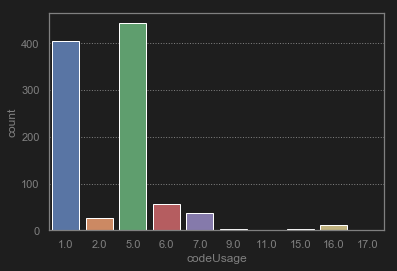

In [81]:
sns.countplot(df2['codeUsage'])

### Usage vehicules: 
- 1 Privé et professionnel
- 2 Agricole1 véhicule dont le PTC < 3500 kg
- 3 Agricole 2 véhicule dont le PTC > 3500 kg 
- 4 Agricole Tracteur et Moissonneuse Batteuse => `Entreprise à supprimer`
- 5 Utilitaire 1 véhicule dont le PTC < 3500 kg (y compris usage voirie) => `Entreprise à supprimer`
- 6 Utilitaire 2 véhicule dont le PTC > 3500 kg (y compris voirie) => `Entreprise à supprimer`
- 7 Transport public de marchandise (avec matière dangereuse et inflammable) => `Entreprise à supprimer`
- 8 Transport public de voyageurs => `supprimer`
- 9 Transport privé de personnes (personnel / enfants /membre d’association) => `Entreprise à supprimer`
- 10 Taxi => `Entreprise à supprimer`
- 11 Auto-Ecole => `Entreprise à supprimer`
- 12 Louage => `Entreprise à supprimer`
- 13 Transport Rural 
- 14 Agences de Voyage et Hôtels => `Entreprise à supprimer`
- 15 Location => `Entreprise à supprimer`
- 16 Engin de Chantiers => `Entreprise à supprimer`
- 17 autres usages (Ambulance / Corbillard / RC Garagiste / RC Trajet etc) => `Entreprise à supprimer`

In [82]:
# Finalement on laisse que les voitures de type usage 1.0 - 2.0 -3.0 - 13.0 
df2=df2.where(df2['codeUsage'].isin([1.0,2.0,3.0,13.0])).dropna(how='all')

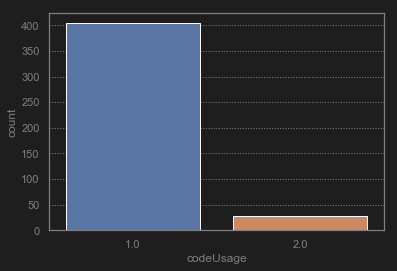

In [83]:
sns.countplot(df2['codeUsage'])

In [84]:
df2.shape

(431, 43)

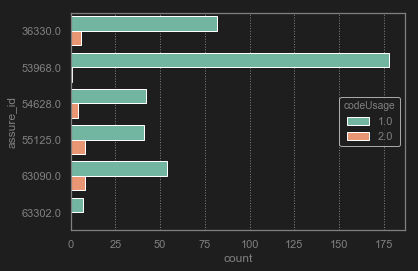

In [85]:
sns.countplot(y="assure_id", hue="codeUsage", data=df2, palette="Set2")

### `Il existe assure_id qui ont plus que 100 vehicule et de type_usage 1 ou 2 donc à verifier`

# <center>2.Les assures qui ont un contrat en cours et police suspendu ou résilié à la fois  </center>

In [86]:
# On fait une jointure entre la table Police et BonusMalus pour acceder au variable Etat_Police et CONTRAT_EN_COURS
df3=pd.merge(left=BonusMalus, right=Police, left_on='police_id', right_on='id')


In [87]:
df3_1 = df3.where((df3['Etat_Police']=='V') & (df3['CONTRAT_EN_COURS']==0)).dropna(how='all')
df3_2 = df3.where((df3['Etat_Police']=='S') & (df3['CONTRAT_EN_COURS']==1)).dropna(how='all')
df3_3 = df3.where((df3['Etat_Police']=='R') & (df3['CONTRAT_EN_COURS']==1)).dropna(how='all')

In [88]:
# On merge les trois tables ensemble chaqu'une contient un type de probleme
df3=pd.concat([df3_1, df3_2,df3_3])

In [89]:
df3.shape

(39350, 43)

In [90]:
# Verifier
df3.head()[['Etat_Police','CONTRAT_EN_COURS']]

Etat_Police  CONTRAT_EN_COURS
504           V               0.0
506           V               0.0
516           V               0.0
641           V               0.0
660           V               0.0

## `On constate l'existance 39350 cas `

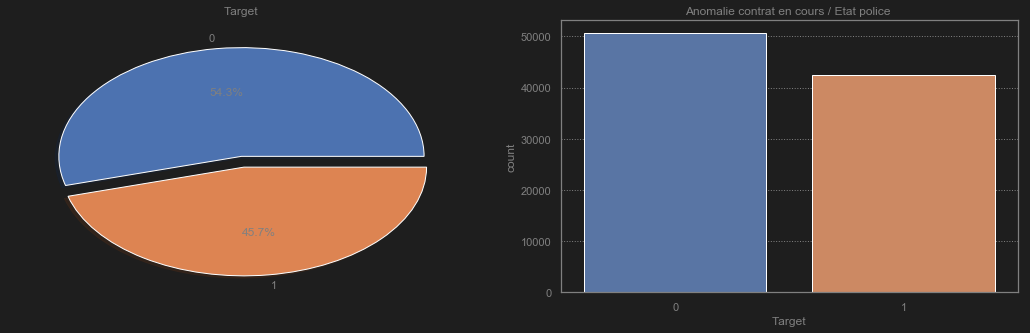

In [91]:
# Afficher pourcentage anomalie en graphe 
liste2=df3['assure_id'].values
BonusMalus["Target"]=0
BonusMalus.Target[BonusMalus['assure_id'].isin(liste2)]=1


f,ax=plt.subplots(1,2,figsize=(18,5))
BonusMalus["Target"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot("Target",data=BonusMalus,ax=ax[1])
ax[1].set_title('Anomalie contrat en cours / Etat police ')
plt.show()

# <center> 3.Voiture qui ont plusieurs classBonusMalus avec des Etat_Police en cours  </center>

# `Conclusion`

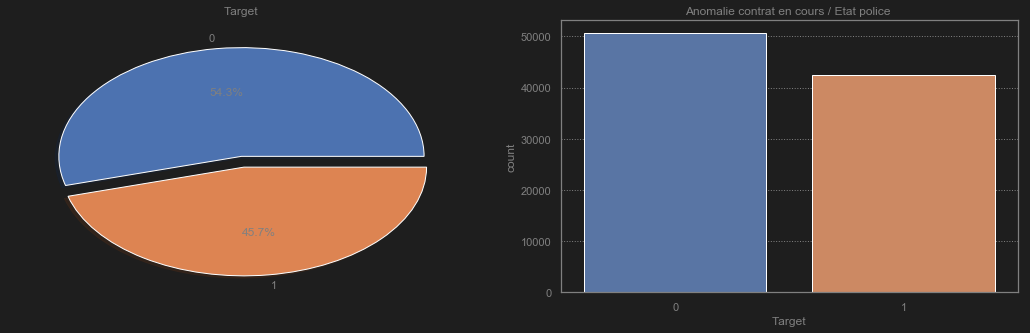

In [92]:
#Cas1: assure possede plusieurs voitures de type I 
liste2=df2['assure_id'].values
#Cas2: des contrats en cours et Etat_Police
liste3=df3['assure_id'].values

BonusMalus["Target"]=0
BonusMalus.Target[BonusMalus['assure_id'].isin(liste2)]=1
BonusMalus.Target[BonusMalus['assure_id'].isin(liste3)]=1

f,ax=plt.subplots(1,2,figsize=(18,5))
BonusMalus["Target"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot("Target",data=BonusMalus,ax=ax[1])
ax[1].set_title('Anomalie contrat en cours / Etat police ')
plt.show()

## => On remarque que 45.7% de notre base de données contient au mois une anomalie 

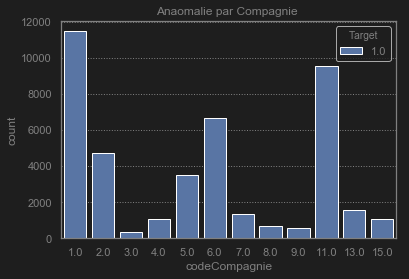

In [107]:
dff = pd.merge(left=BonusMalus, right=Police, left_on='police_id', right_on='id')
dff=dff.where(dff['Target']==1).dropna(how='all')

plt.title('Anaomalie par Compagnie ')
ax2 = sns.countplot(x= 'codeCompagnie', hue = 'Target', data = dff)
plt.show()